# 1.Define Business Case / Problem Statements

# 2.Import Basic Libraries

In [124]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sweetviz as sv 
import pickle 

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [123]:
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, f1_score,classification_report

# 3.Load Data

In [3]:
df = pd.read_csv('indian_liver_patient.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
## if score==negative, mark 0 ;else 1 

def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

In [5]:
df.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
385,50,Male,0.8,0.2,152,29,30,7.4,4.1,1.3,1
269,26,Male,0.6,0.1,110,15,20,2.8,1.6,1.3,1
60,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.0,1
122,58,Male,1.7,0.8,188,60,84,5.9,3.5,1.4,0
291,60,Male,0.7,0.2,174,32,14,7.8,4.2,1.1,0


In [6]:
# Overview Report of Dataset

prof = ProfileReport(df)
prof.to_file(output_file='liver.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 4.Domain Analysis

# 5.BasicChecks(shape,head,shape,tail,dtype,describe,Info,Isnull,duplicated,unique-if you have categorical column.value_count)

In [7]:
#To check shape of the columns

df.shape

(583, 11)

In [8]:
#To check first five rows

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
#To check last five columns

df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [10]:
#To check random five columns

df.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
319,14,Male,0.9,0.3,310,21,16,8.1,4.2,1.00,0
172,55,Male,14.1,7.6,750,35,63,5.0,1.6,0.47,1
249,33,Male,1.2,0.3,498,28,25,7.0,3.0,0.70,1
523,50,Male,0.6,0.2,137,15,16,4.8,2.6,1.10,1
128,58,Female,1.7,0.8,1896,61,83,8.0,3.9,0.95,1


In [11]:
#To check datatype of columns

df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [12]:
#To check statistical information

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,0.713551,0.452490,0.0,0.0,1.00,1.0,1.0


In [13]:
# To check basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [14]:
# To check Null values

df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [15]:
#Duplicated values.

df.duplicated().sum()

13

In [16]:
#To drop duplicated value

df.drop_duplicates(inplace=True)

In [17]:
#To check duplicated value

df.duplicated().sum()

0

In [18]:
#Size of dataset after removing duplicated values.

df.shape

(570, 11)

In [19]:
# Featch numerical columns

num_col=df.select_dtypes(include=['int64','float64'])
num_col.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [20]:
# Featch categorical columns

cat_col=df.select_dtypes(include=['object'])
cat_col.columns

Index(['Gender'], dtype='object')

In [21]:
# find unique categories in dataset

for i in cat_col:
    print(i,df[i].unique())
    print(df[i].value_counts())
    print('******************')

Gender ['Female' 'Male']
Gender
Male      430
Female    140
Name: count, dtype: int64
******************


# 6.Exploratory Data Analysis

***i).Univariate Analysis***

In [22]:
#Sweetviz Report for univariate data analysis
my_report = sv.analyze(df)

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


***ii).Bivariate Analysis***

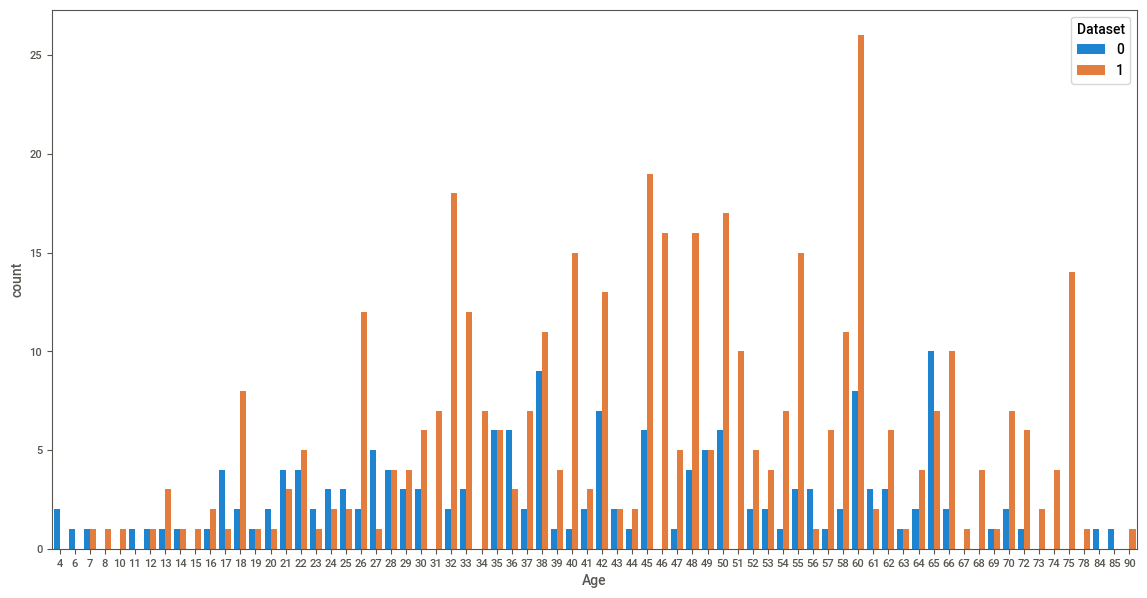

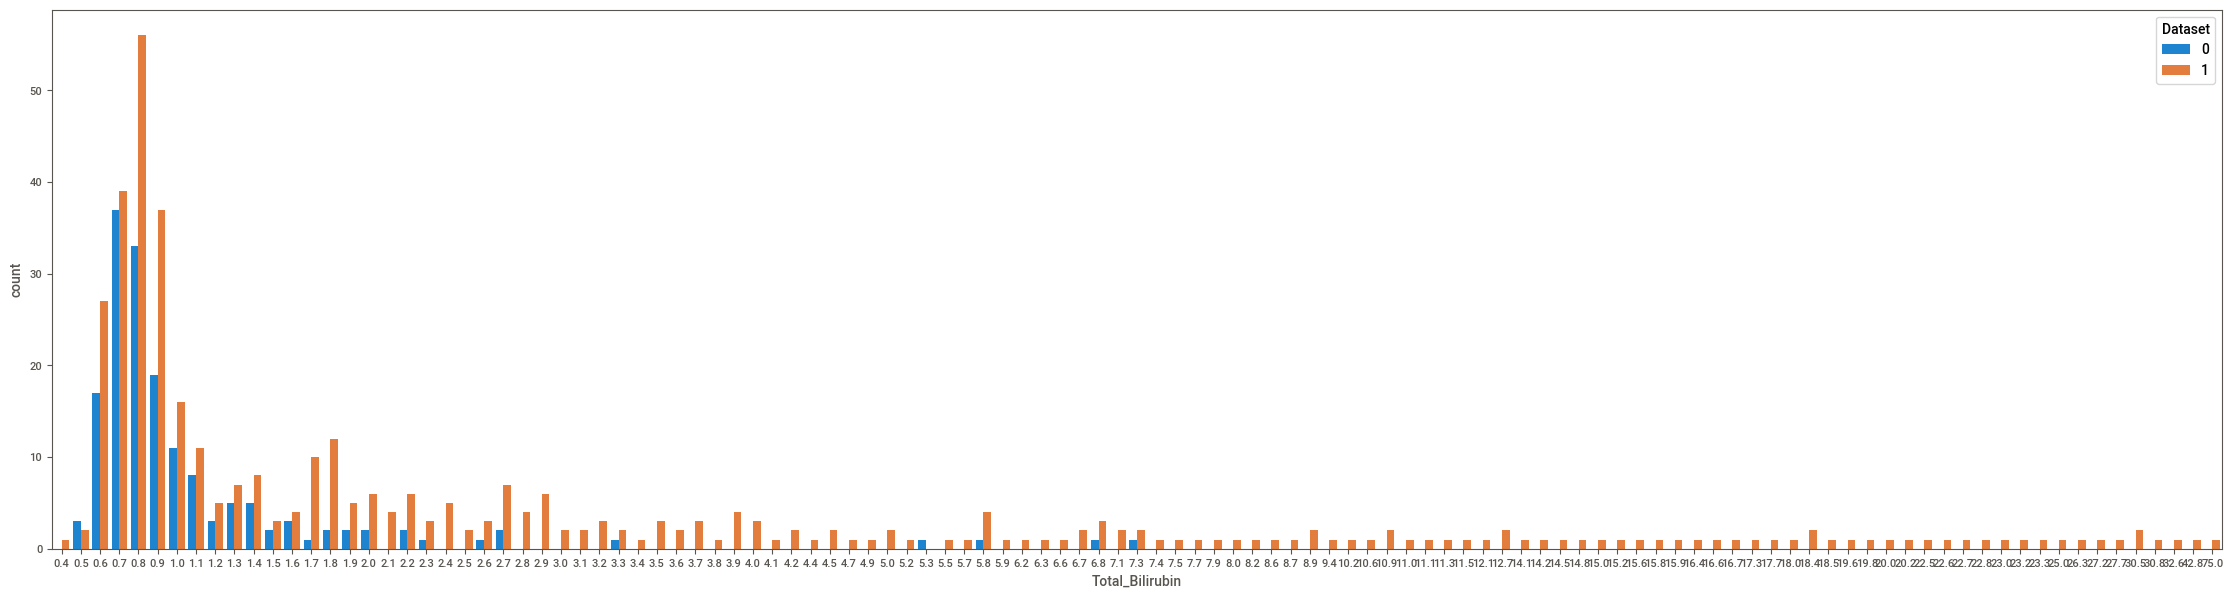

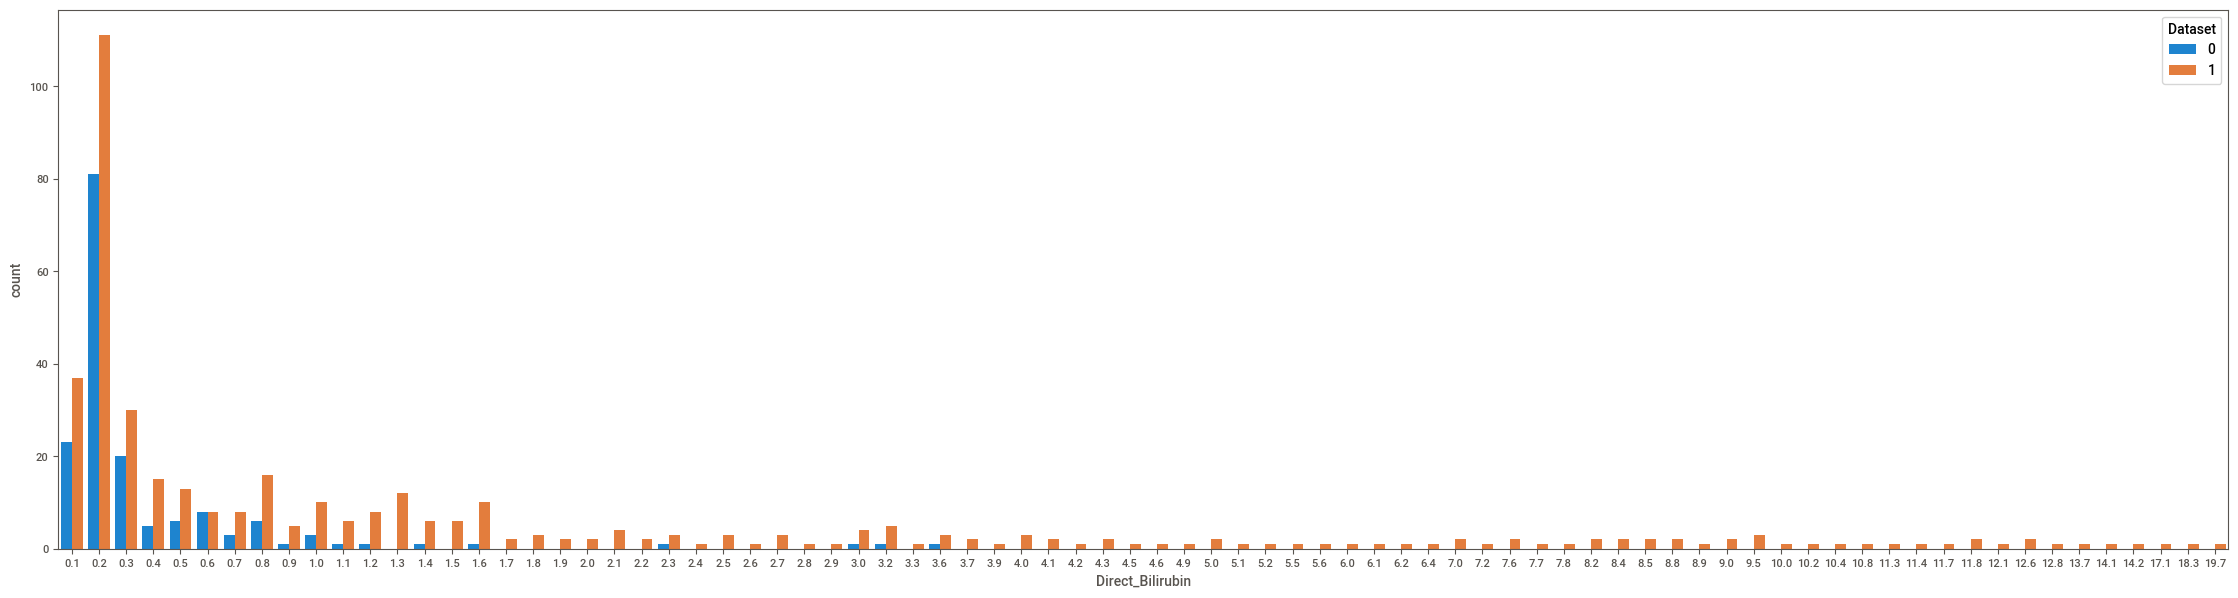

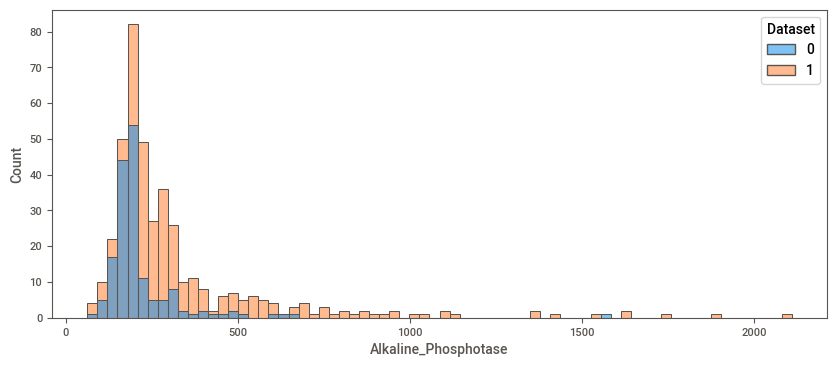

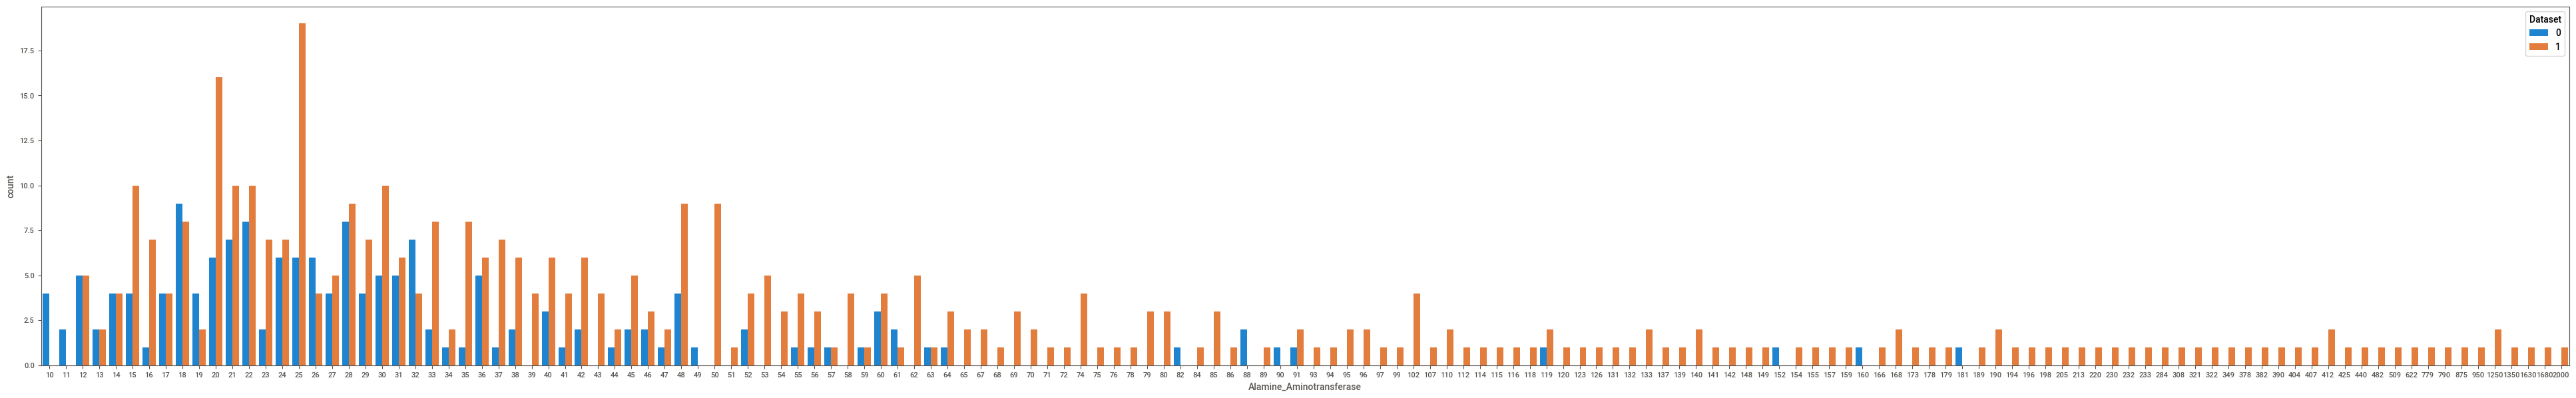

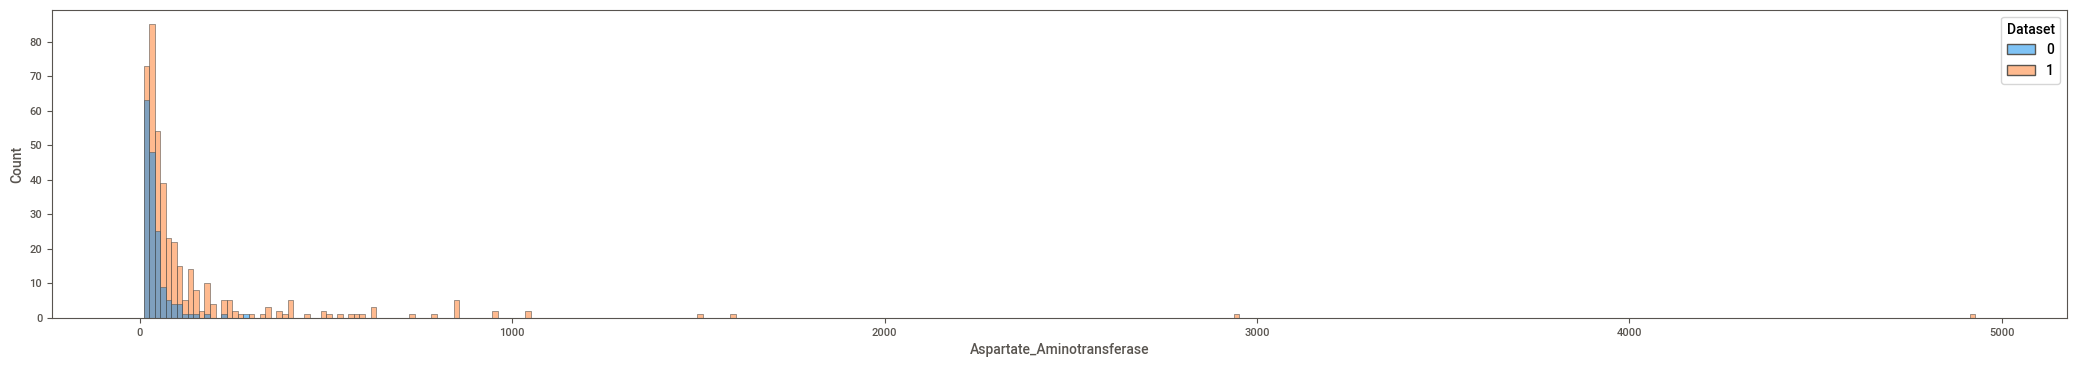

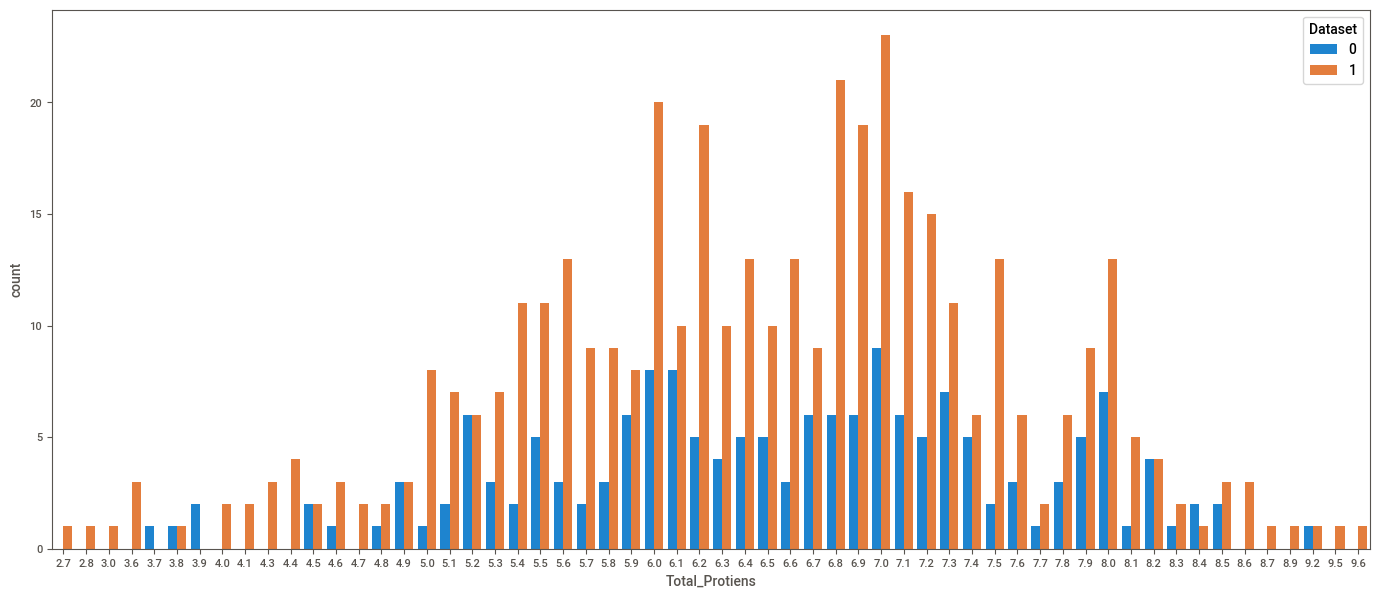

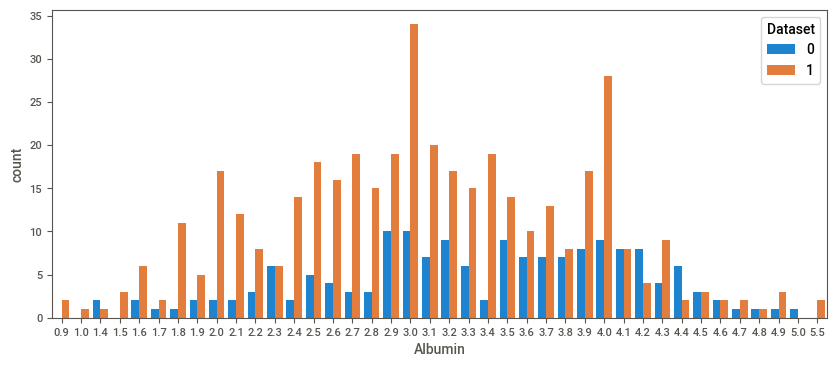

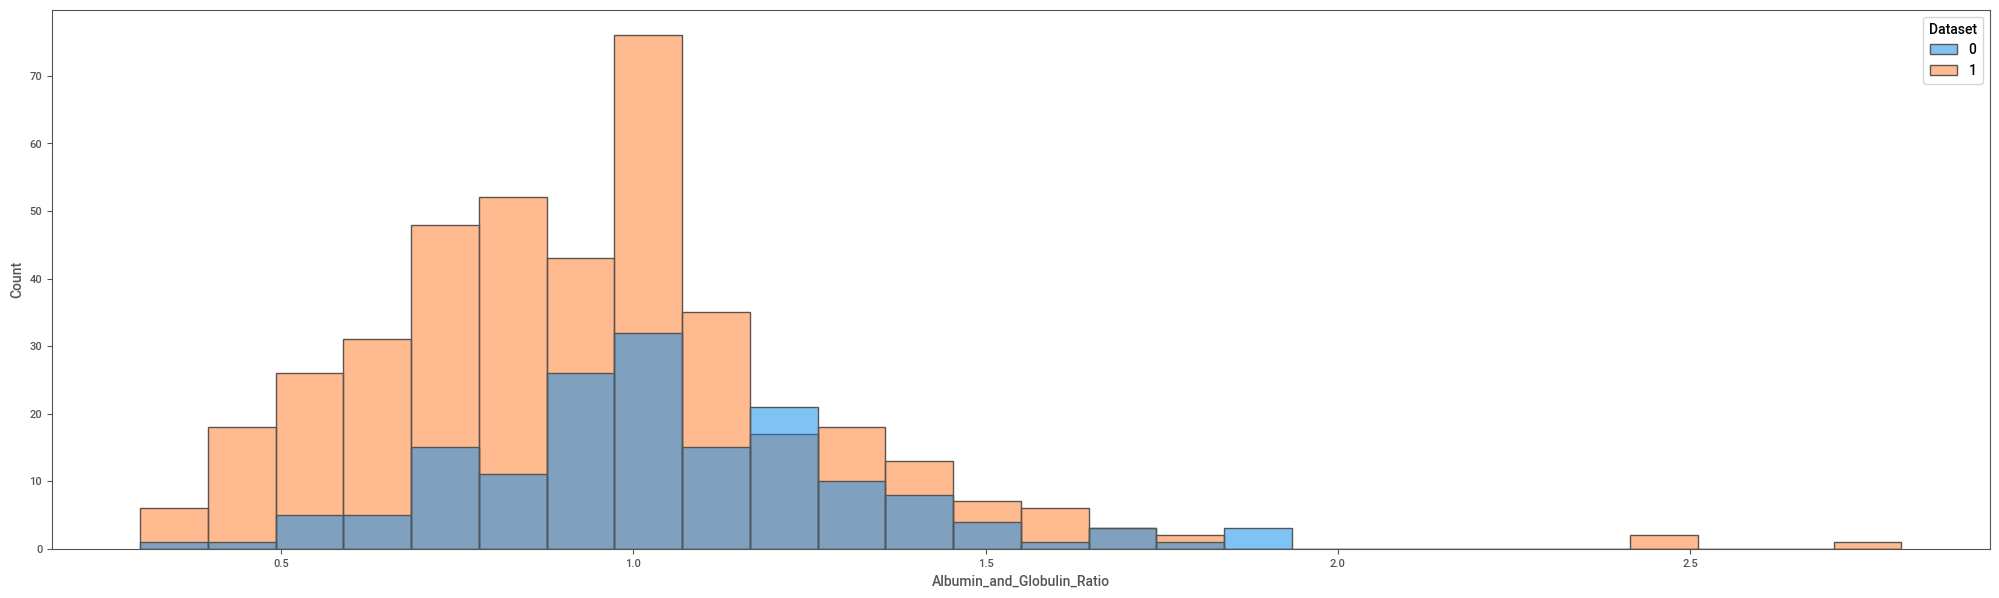

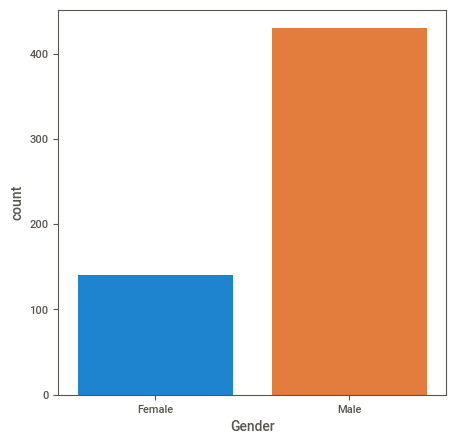

In [23]:
#Relation of Age and Dataset column

plt.figure(figsize=(14,7))
sns.countplot(data=df,x='Age',hue='Dataset')
plt.show()


# Analyse the relationship between Total_Bilirubin and Dataset.

plt.figure(figsize=(28,7))
sns.countplot(data=df,x='Total_Bilirubin',hue='Dataset')
plt.show()


# Analyse the relationship between Direct_Bilirubin and Dataset.

plt.figure(figsize=(28,7))
sns.countplot(data=df,x='Direct_Bilirubin',hue='Dataset')
plt.show()


# Analyse the relationship between Alkaline_Phosphotase and Dataset.

plt.figure(figsize=(10,4))
sns.histplot(data=df,x='Alkaline_Phosphotase',hue='Dataset')
plt.show()


# Analyse the relationship between Alamine_Aminotransferase and Dataset.

plt.figure(figsize=(49,7))
sns.countplot(data=df,x='Alamine_Aminotransferase',hue='Dataset')
plt.show()


# Analyse the relationship between Aspartate_Amiotransferase and Dataset.

plt.figure(figsize=(26,4))

sns.histplot(data=df,x='Aspartate_Aminotransferase',hue='Dataset')
plt.show()


# Analyse the relationship between Total_Protien and Dataset.

plt.figure(figsize=(17,7))
sns.countplot(data=df,x='Total_Protiens',hue='Dataset')
plt.show()



# Analyse the relationship between Albumin and Dataset.

plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Albumin',hue='Dataset')
plt.show()

# Analyse the relationship between Albumin_and_Globulin_Ratio and Dataset.
plt.figure(figsize=(25,7))
sns.histplot(data=df,x='Albumin_and_Globulin_Ratio',hue='Dataset')
plt.show()


# Analyse the relationship between Gender and Dataset
plt.figure(figsize=(5,5))
sns.countplot(data=df, x = 'Gender', label='Count')
plt.show()

In [24]:
df.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
373,25,Female,0.7,0.1,140,32,25,7.6,4.3,1.3,0
221,47,Male,0.9,0.2,192,38,24,7.3,4.3,1.4,1
133,53,Male,0.9,0.4,238,17,14,6.6,2.9,0.8,1
263,38,Female,0.8,0.2,185,25,21,7.0,3.0,0.7,1
140,60,Male,0.6,0.1,186,20,21,6.2,3.3,1.1,0


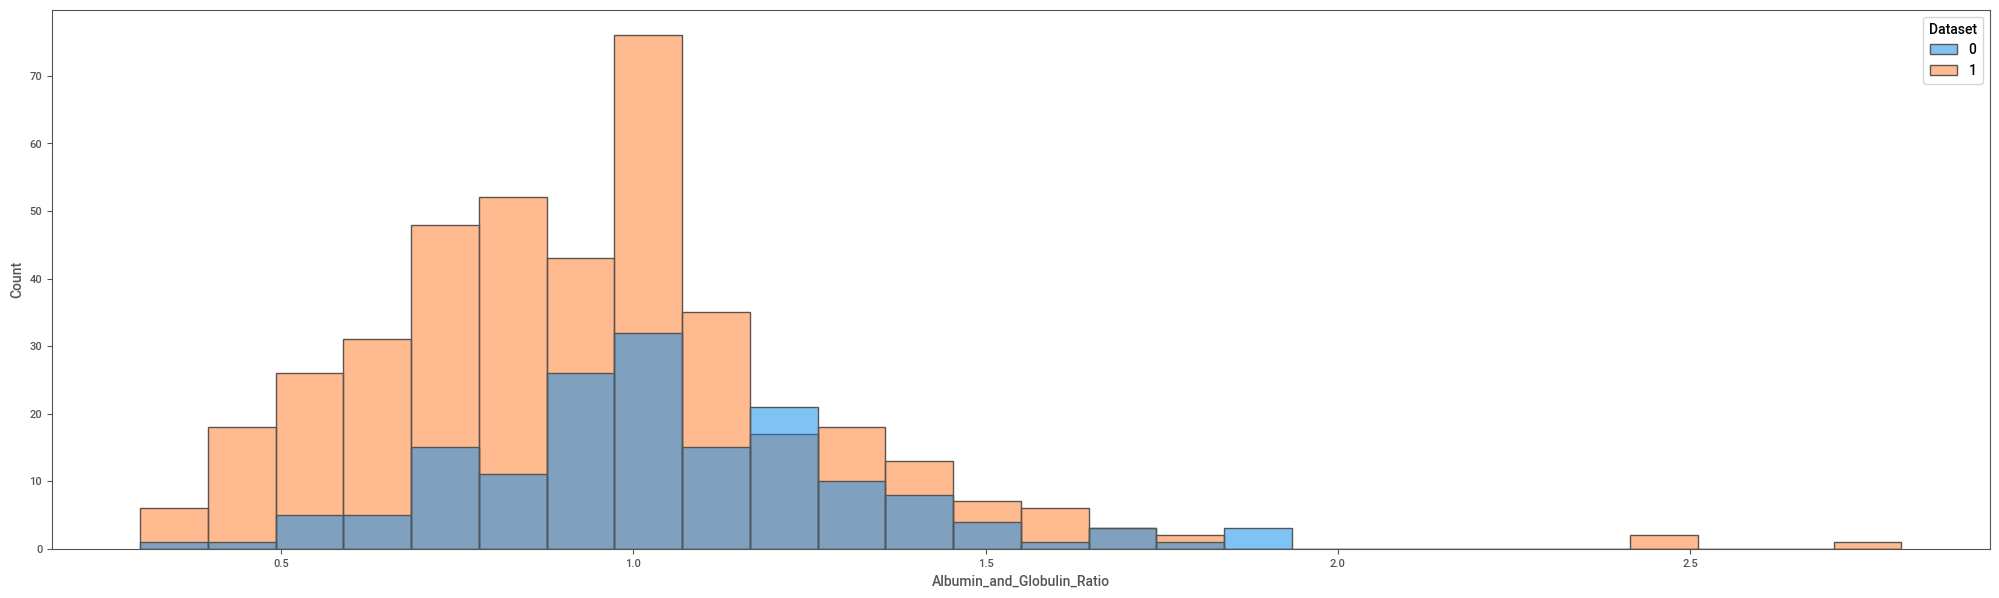

In [25]:
plt.figure(figsize=(25,7))
sns.histplot(data=df,x='Albumin_and_Globulin_Ratio',hue='Dataset')
plt.show()

***2-D Scatter Plot***

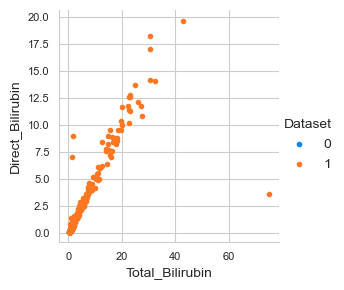

In [26]:
#To check 3-numerical values
#To check relation between Total_Bilirubin and Direct_Bilirubin with Dataset

sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset').map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()
plt.show()

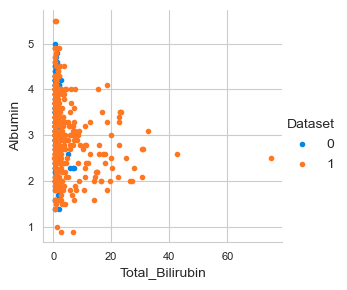

In [27]:
#To check relation between Total_Bilirubin and Albumin with Dataset

sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset').map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()
plt.show()

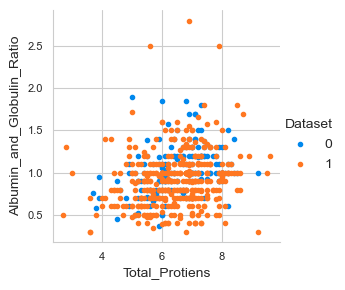

In [28]:
#To check relation between Total_Protiens and Albumin_and_Globulin_Ratio with Dataset

sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset').map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()
plt.show()

***iii).Multivariate Analysis***

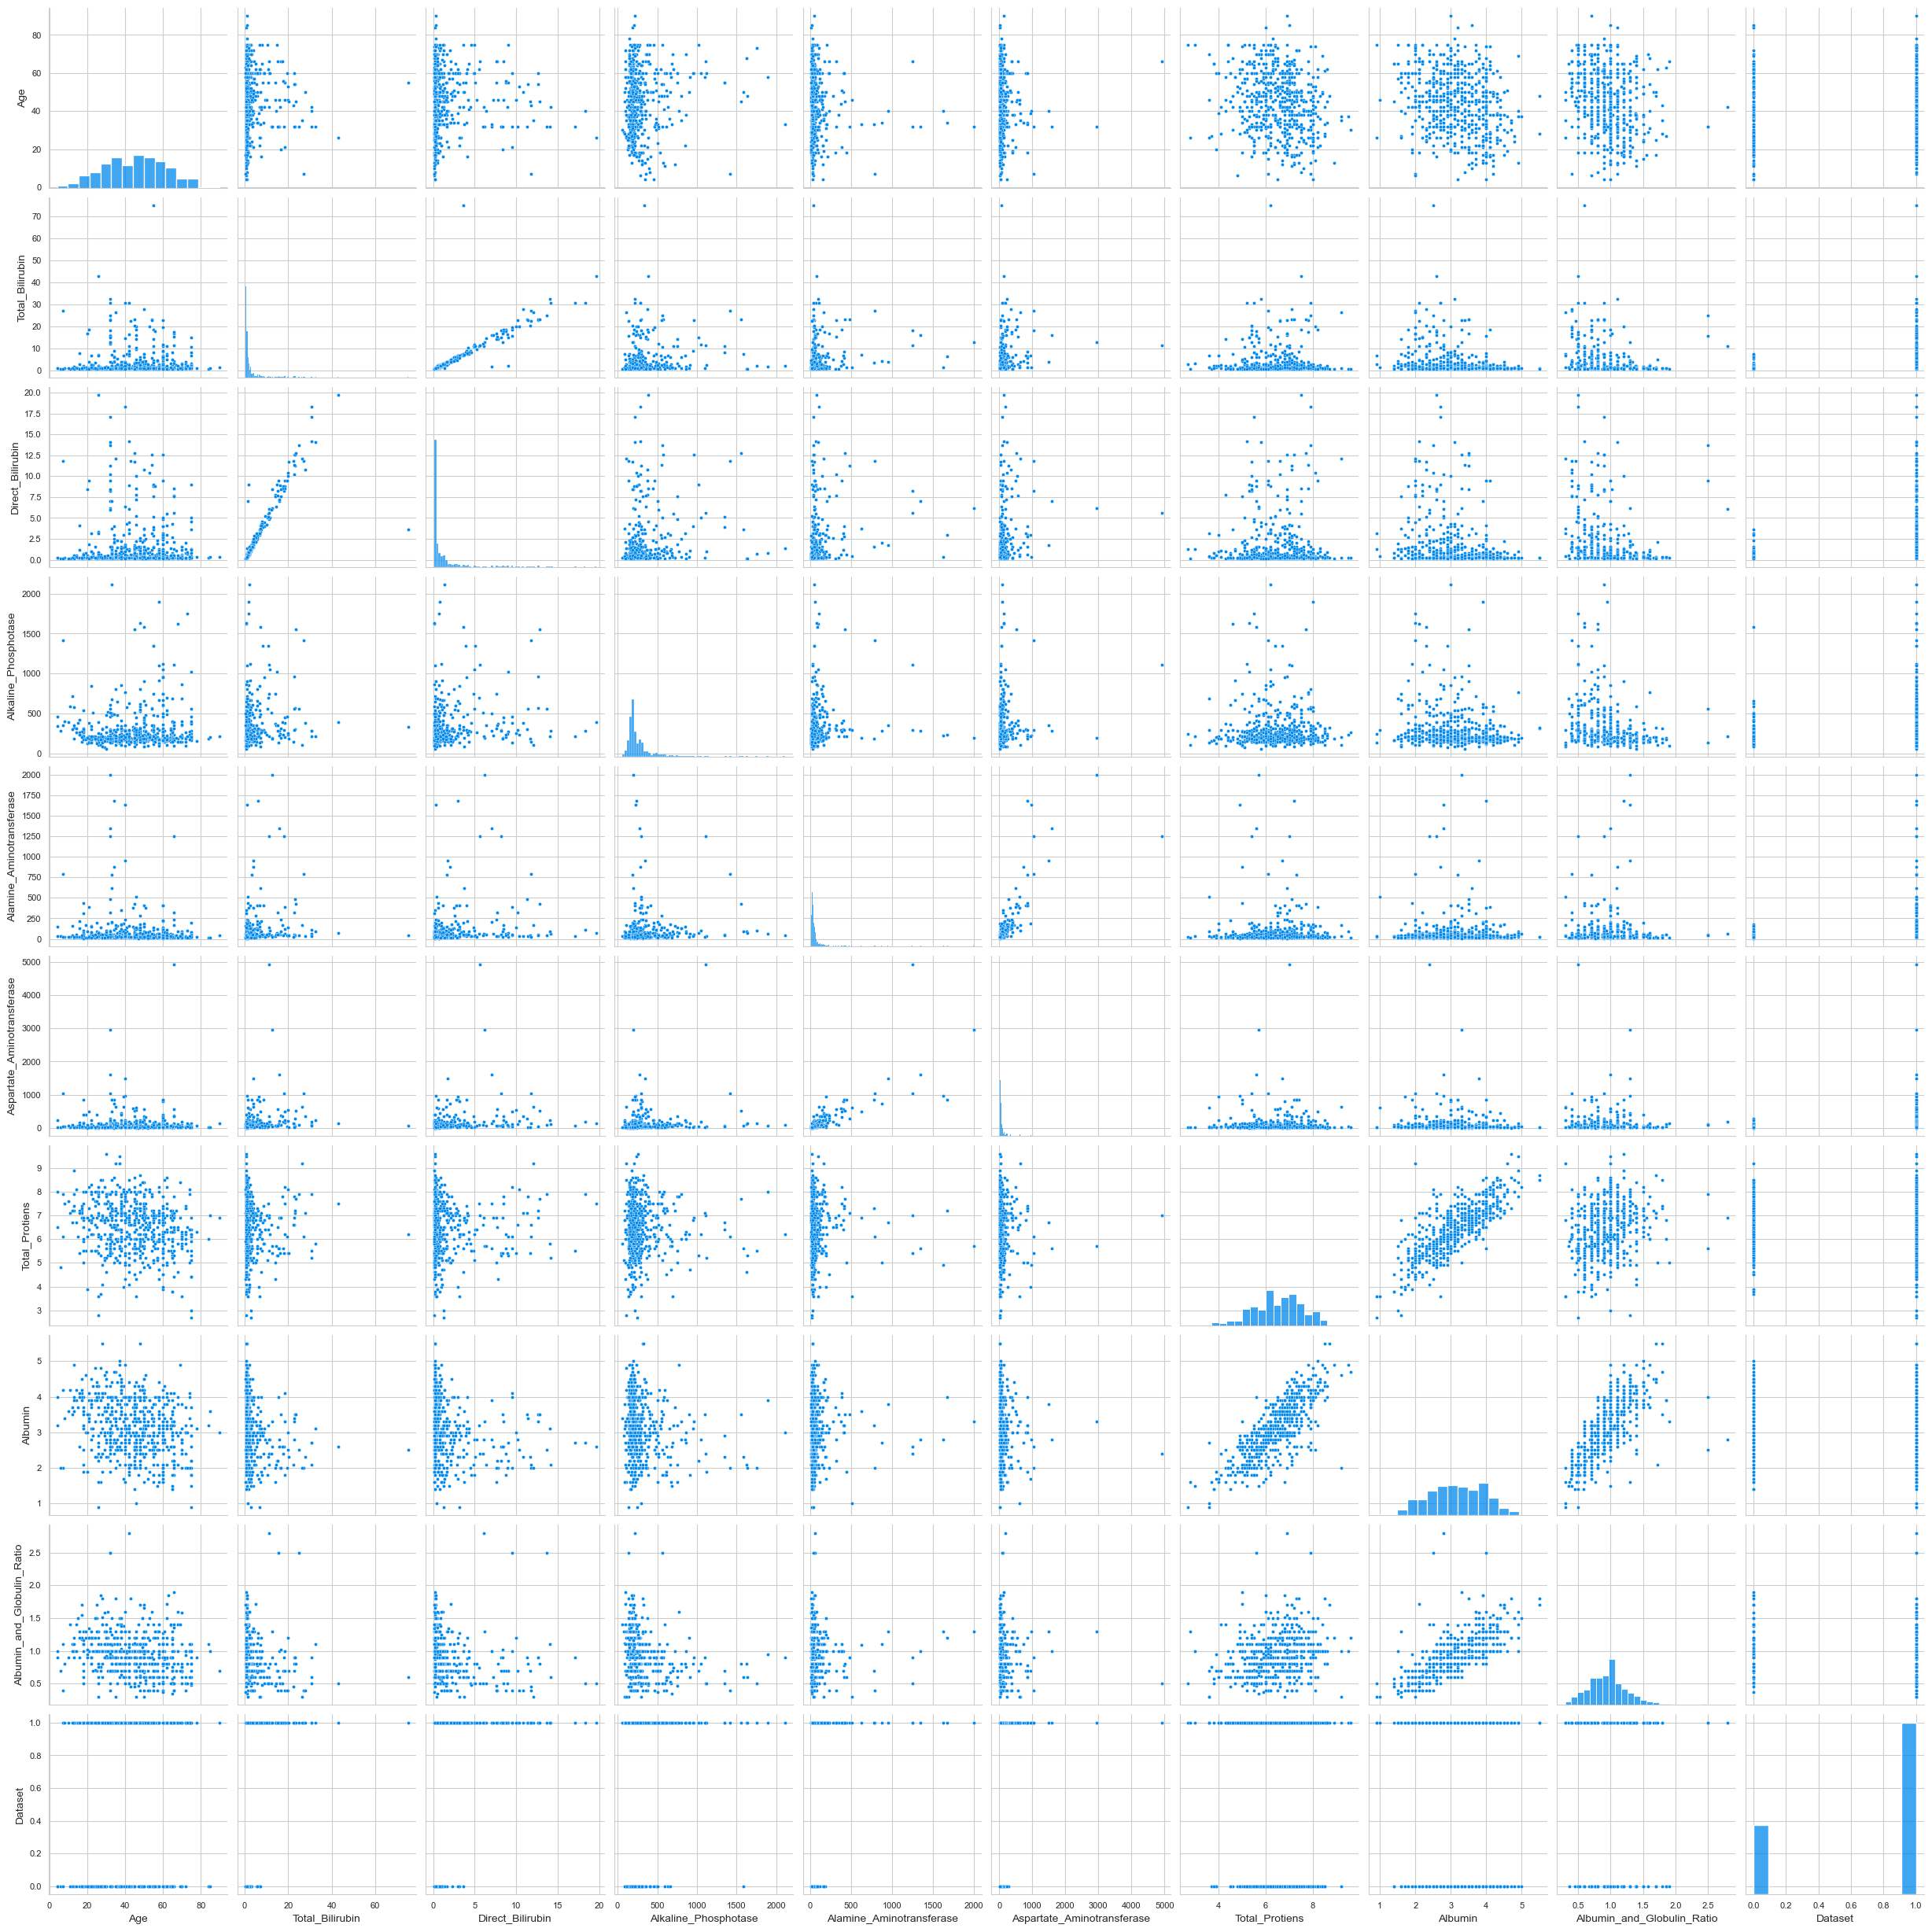

In [29]:
sns.pairplot(df)
plt.show()

# 7.Data Preprocessing.(Handling Missing Value,Handling Outliers,Handling Skewness,Handling Categorical Data)

**i).Handling a missing values**

In dataset Albumin_and_Globulin_Ratio columns has missing values.

In [30]:
#To check datatype of a column

df['Albumin_and_Globulin_Ratio'].dtypes # Object datatype

dtype('float64')

In [31]:
#To find most repeated value

df['Albumin_and_Globulin_Ratio'].value_counts()

Albumin_and_Globulin_Ratio
1.00    104
0.80     62
0.90     57
0.70     53
1.10     45
       ... 
0.58      1
0.69      1
1.27      1
1.12      1
0.37      1
Name: count, Length: 69, dtype: int64

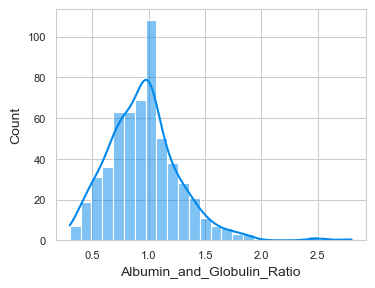

Skewness of the column: 1.0012944308926688


In [32]:
## Histogram since it has numerical value

plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Albumin_and_Globulin_Ratio',kde=True)
plt.show()
print("Skewness of the column:",df['Albumin_and_Globulin_Ratio'].skew())

Insight: Column has right skewed data replace NaN values from median value.

In [33]:
# Check median value for Normalized-Losses column.

df['Albumin_and_Globulin_Ratio'].median()

0.95

In [34]:
#To make all column value is NaN

df.loc[df['Albumin_and_Globulin_Ratio'].isnull()==True]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [35]:
#Imputting the missing values with median

df.loc[df['Albumin_and_Globulin_Ratio'].isnull()==True,'Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].median()

In [36]:
#To check null values.

df['Albumin_and_Globulin_Ratio'].isnull().sum()

0

**ii).Handling Outliers**

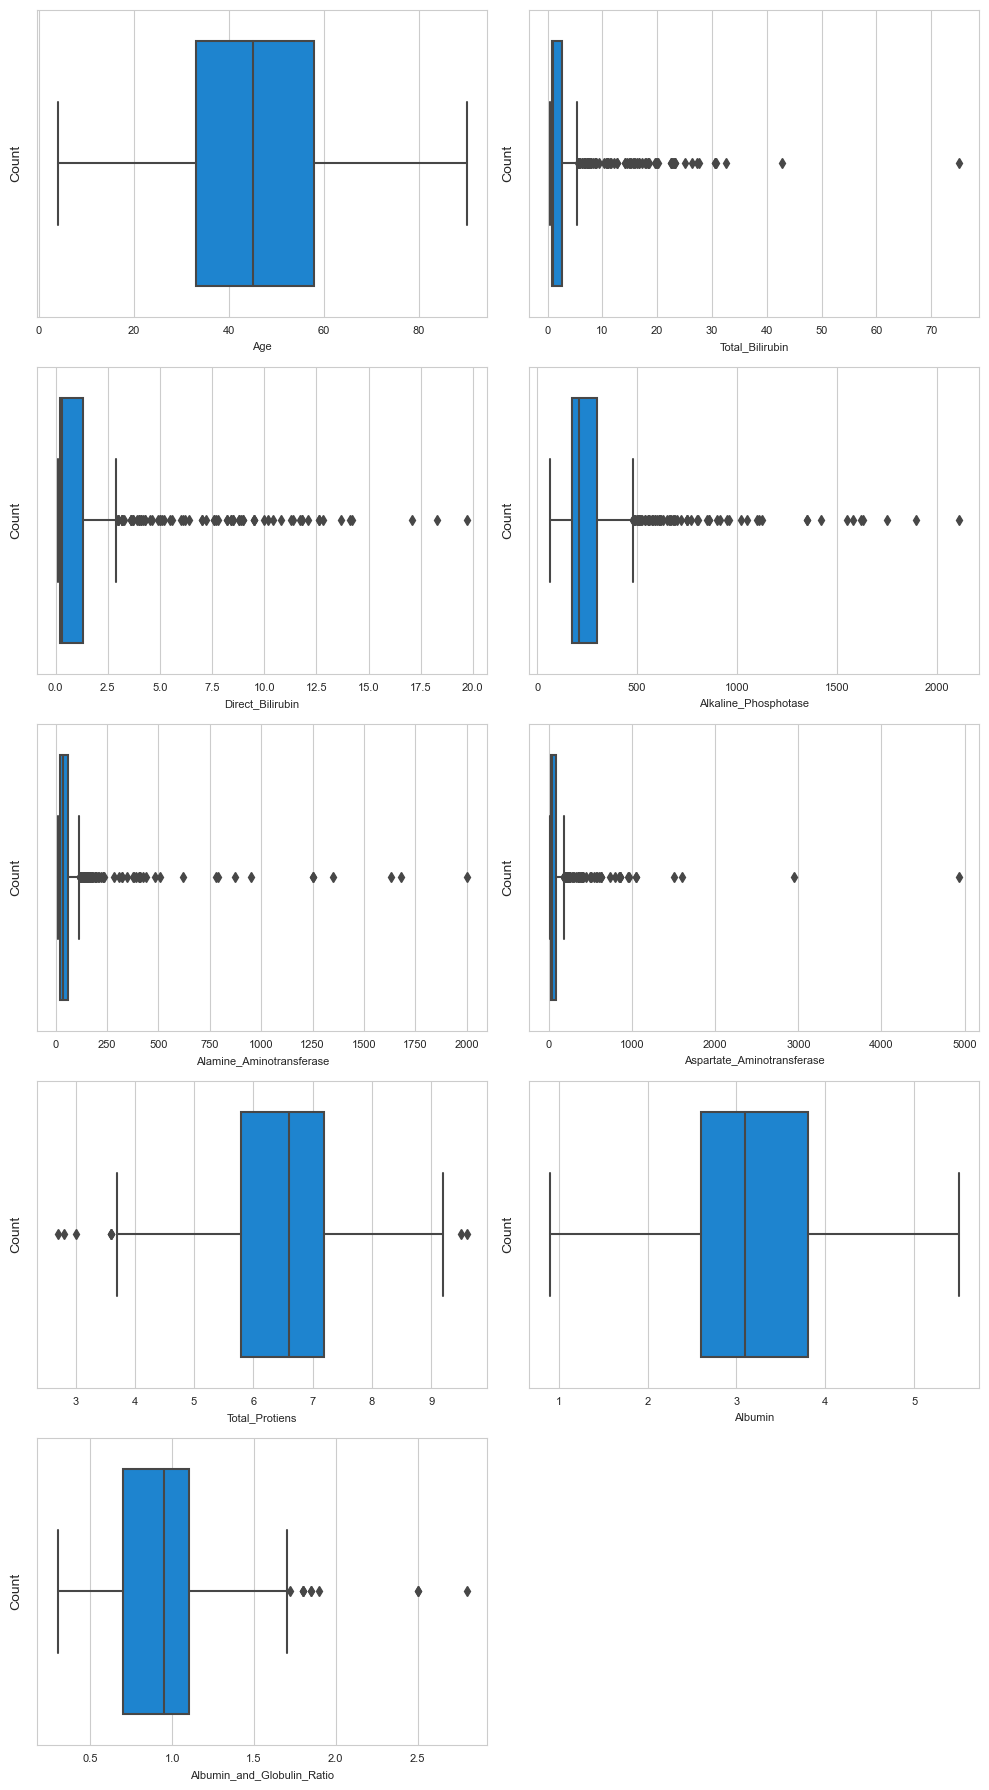

In [37]:
# check outliers.

plt.figure(figsize=(10,18),facecolor='white')
plotnumber=1 # Initialize count
for column in df.drop(columns=["Dataset","Gender"],axis=1):
    if plotnumber < 10:# Total no.of column of range (1 to 10)
        ax=plt.subplot(5,2,plotnumber) # It mention rows and column in canva
        sns.boxplot(x=df[column])
        plt.xlabel(column,fontsize=8)
        plt.ylabel("Count",fontsize=10)
    plotnumber +=1
plt.tight_layout()

**Total_Bilirubin**

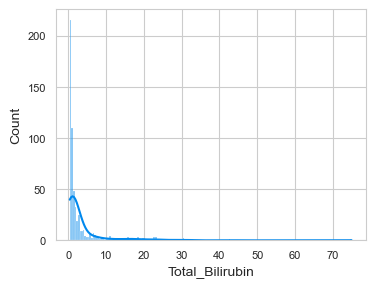

Skewness of the column: 4.869458703859958


In [38]:
plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Total_Bilirubin',kde=True)
plt.show()
print("Skewness of the column:",df['Total_Bilirubin'].skew())

Total_Bilirubin is a Normal distribution because it's skewness is less than 5.

In [39]:
#Basic info about column
df["Total_Bilirubin"].describe()

count    570.000000
mean       3.321754
std        6.267941
min        0.400000
25%        0.800000
50%        1.000000
75%        2.600000
max       75.000000
Name: Total_Bilirubin, dtype: float64

In [40]:
lower_limit=df['Total_Bilirubin'].mean()-3*df['Total_Bilirubin'].std()
upper_limit=df['Total_Bilirubin'].mean()+3*df['Total_Bilirubin'].std()
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_limit -15.482068291736088
upper_limit 22.12557706366591


In [41]:
# Find value less than lower limit

df.loc[df['Total_Bilirubin']>upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
120,32,Male,23.0,11.3,300,482,275,7.1,3.5,0.90,1
121,32,Male,22.7,10.2,290,322,113,6.6,2.8,0.70,1
166,55,Male,75.0,3.6,332,40,66,6.2,2.5,0.60,1
168,60,Male,22.8,12.6,962,53,41,6.9,3.3,0.90,1
199,7,Female,27.2,11.8,1420,790,1050,6.1,2.0,0.40,1
259,42,Male,30.5,14.2,285,65,130,5.2,2.1,0.60,1
311,54,Female,23.2,12.6,574,43,47,7.2,3.5,0.90,1
370,54,Female,22.6,11.4,558,30,37,7.8,3.4,0.80,1
447,45,Female,23.3,12.8,1550,425,511,7.7,3.5,0.80,1
504,32,Male,30.5,17.1,218,39,79,5.5,2.7,0.90,1


In [42]:
# To find percentage of outliers.

len(df.loc[df['Total_Bilirubin']>upper_limit] )/len(df)

0.02982456140350877

In [43]:
# To find value below lower_limit.

df.loc[df['Total_Bilirubin']<lower_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [44]:
# To set the value of outliers is mean.

df['Total_Bilirubin'] = np.where(
    df['Total_Bilirubin']>upper_limit,
    df["Total_Bilirubin"].mean(),
    np.where(
        df['Total_Bilirubin']<lower_limit,
        df["Total_Bilirubin"].mean(),
        df['Total_Bilirubin']
    )
)

In [45]:
# Check Outliers

# Find value less than lower limit

df.loc[df['Total_Bilirubin']>upper_limit]

# To find value below lower_limit.

df.loc[df['Total_Bilirubin']<lower_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


**Direct_Bilirubin**

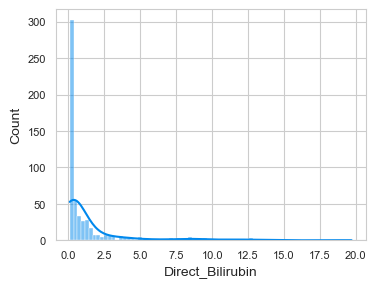

Skewness of the column: 3.1876850011164097


In [46]:
plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Direct_Bilirubin',kde=True)
plt.show()
print("Skewness of the column:",df['Direct_Bilirubin'].skew())

Direct_Bilirubin is a Normal distribution because it's skewness is less than 5.

In [47]:
#Basic info about column
df["Direct_Bilirubin"].describe()

count    570.000000
mean       1.497544
std        2.833231
min        0.100000
25%        0.200000
50%        0.300000
75%        1.300000
max       19.700000
Name: Direct_Bilirubin, dtype: float64

In [48]:
lower_limit=df['Direct_Bilirubin'].mean()-3*df['Direct_Bilirubin'].std()
upper_limit=df['Direct_Bilirubin'].mean()+3*df['Direct_Bilirubin'].std()
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_limit -7.002150030489866
upper_limit 9.997237749788113


In [49]:
# Find value less than lower limit

df.loc[df['Direct_Bilirubin']>upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
120,32,Male,3.321754,11.3,300,482,275,7.1,3.5,0.90,1
121,32,Male,3.321754,10.2,290,322,113,6.6,2.8,0.70,1
168,60,Male,3.321754,12.6,962,53,41,6.9,3.3,0.90,1
199,7,Female,3.321754,11.8,1420,790,1050,6.1,2.0,0.40,1
259,42,Male,3.321754,14.2,285,65,130,5.2,2.1,0.60,1
311,54,Female,3.321754,12.6,574,43,47,7.2,3.5,0.90,1
370,54,Female,3.321754,11.4,558,30,37,7.8,3.4,0.80,1
447,45,Female,3.321754,12.8,1550,425,511,7.7,3.5,0.80,1
503,53,Male,19.800000,10.4,238,39,221,8.1,2.5,0.40,1
504,32,Male,3.321754,17.1,218,39,79,5.5,2.7,0.90,1


In [50]:
# To find percentage of outliers.

len(df.loc[df['Direct_Bilirubin']>upper_limit] )/len(df)

0.03333333333333333

In [51]:
# To find value below lower_limit.

df.loc[df['Direct_Bilirubin']<lower_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [52]:
# To set the value of outliers is mean.

df["Direct_Bilirubin"] = np.where(
    df["Direct_Bilirubin"]>upper_limit,
    df["Direct_Bilirubin"].mean(),
    np.where(
        df["Direct_Bilirubin"]<lower_limit,
        df["Direct_Bilirubin"].mean(),
        df['Direct_Bilirubin']
    )
)

In [53]:
# Check Outliers

# Find value less than lower limit

df.loc[df['Direct_Bilirubin']>upper_limit]

# To find value below lower_limit.

df.loc[df['Direct_Bilirubin']<lower_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


**Alkaline_Phosphotase**

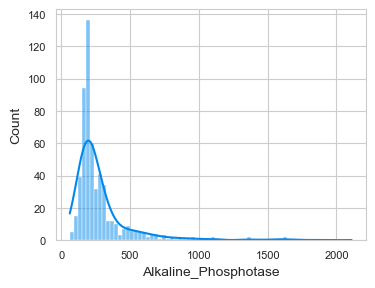

Skewness of the column: 3.7284052766849434


In [54]:
plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Alkaline_Phosphotase',kde=True)
plt.show()
print("Skewness of the column:",df['Alkaline_Phosphotase'].skew())

Alkaline_Phosphotase is a Normal distribution because it's skewness is less than 5.

In [55]:
#Basic info about column
df["Alkaline_Phosphotase"].describe()

count     570.000000
mean      291.750877
std       245.291859
min        63.000000
25%       176.000000
50%       208.000000
75%       298.000000
max      2110.000000
Name: Alkaline_Phosphotase, dtype: float64

In [56]:
lower_limit=df['Alkaline_Phosphotase'].mean()-3*df['Alkaline_Phosphotase'].std()
upper_limit=df['Alkaline_Phosphotase'].mean()+3*df['Alkaline_Phosphotase'].std()
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_limit -444.12469925243795
upper_limit 1027.6264536384028


In [57]:
# Find value less than lower limit

df.loc[df['Alkaline_Phosphotase']>upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
77,68,Female,0.600000,0.100000,1620,95,127,4.6,2.1,0.80,1
115,50,Male,7.300000,3.600000,1580,88,64,5.6,2.3,0.60,0
116,48,Male,0.700000,0.100000,1630,74,149,5.3,2.0,0.60,1
128,58,Female,1.700000,0.800000,1896,61,83,8.0,3.9,0.95,1
135,66,Male,11.300000,5.600000,1110,1250,4929,7.0,2.4,0.50,1
161,60,Male,11.500000,5.000000,1050,99,187,6.2,2.8,0.80,1
195,60,Male,2.400000,1.000000,1124,30,54,5.2,1.9,0.50,1
199,7,Female,3.321754,1.497544,1420,790,1050,6.1,2.0,0.40,1
233,33,Male,2.000000,1.400000,2110,48,89,6.2,3.0,0.90,1
419,55,Female,8.200000,3.900000,1350,52,65,6.7,2.9,0.70,1


In [58]:
# To find percentage of outliers.

len(df.loc[df['Alkaline_Phosphotase']>upper_limit] )/len(df)

0.02456140350877193

In [59]:
# To find value below lower_limit.

df.loc[df['Alkaline_Phosphotase']<lower_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [60]:
# To set the value of outliers is mean.

df["Alkaline_Phosphotase"] = np.where(
    df["Alkaline_Phosphotase"]>upper_limit,
    df["Alkaline_Phosphotase"].mean(),
    np.where(
        df["Alkaline_Phosphotase"]<lower_limit,
        df["Alkaline_Phosphotase"].mean(),
        df['Alkaline_Phosphotase']
    )
)

In [61]:
# Check Outliers

# Find value less than lower limit

df.loc[df['Alkaline_Phosphotase']>upper_limit]

# To find value below lower_limit.

df.loc[df['Alkaline_Phosphotase']<lower_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


**Alamine_Aminotransferase**

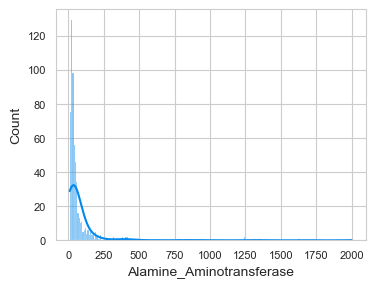

Skewness of the column: 6.695054145869701


In [62]:
plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Alamine_Aminotransferase',kde=True)
plt.show()
print("Skewness of the column:",df['Alamine_Aminotransferase'].skew())

Alamine_Aminotransferase  is a skew distribution because it's skewness is greater than 5.

In [63]:
#Basic info about column
df["Alamine_Aminotransferase"].describe()

count     570.000000
mean       79.728070
std       181.471697
min        10.000000
25%        23.000000
50%        35.000000
75%        60.000000
max      2000.000000
Name: Alamine_Aminotransferase, dtype: float64

In [64]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['Alamine_Aminotransferase'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['Alamine_Aminotransferase'].quantile(0.75) # 75%
print("upper_quantile",Q3)


lower_quantile 23.0
upper_quantile 60.0


In [65]:
# To Find IQR.

IQR=Q3-Q1
IQR

37.0

In [66]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit -32.5
upper_limit 115.5


In [67]:
# To find value above upper_limit.

df.loc[df['Alamine_Aminotransferase']>upper_limit] 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
16,38,Male,1.8,0.8,342.0,168,441,7.6,4.4,1.3,1
18,40,Female,0.9,0.3,293.0,232,245,6.8,3.1,0.8,1
22,62,Male,6.8,3.0,542.0,116,66,6.4,3.1,0.9,1
25,34,Male,4.1,2.0,289.0,875,731,5.0,2.7,1.1,1
27,34,Male,6.2,3.0,240.0,1680,850,7.2,4.0,1.2,1
...,...,...,...,...,...,...,...,...,...,...,...
560,66,Male,15.2,7.7,356.0,321,562,6.5,2.2,0.4,1
561,66,Male,16.6,7.6,315.0,233,384,6.9,2.0,0.4,1
562,66,Male,17.3,8.5,388.0,173,367,7.8,2.6,0.5,1
569,16,Male,7.7,4.1,268.0,213,168,7.1,4.0,1.2,1


In [68]:
# To find percentage of outliers.

len(df.loc[df['Alamine_Aminotransferase']>upper_limit] )/len(df)

0.12631578947368421

In [69]:
# To find value below lower_limit.

df.loc[df['Alamine_Aminotransferase']<lower_limit] # There are no data in lower limit.

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [70]:
# To set the value of outliers is mean.

df["Alamine_Aminotransferase"] = np.where(
    df["Alamine_Aminotransferase"]>upper_limit,
    df["Alamine_Aminotransferase"].median(),
    np.where(
        df["Alamine_Aminotransferase"]<lower_limit,
        df["Alamine_Aminotransferase"].median(),
        df['Alamine_Aminotransferase']
    )
)

In [71]:
# Check Outliers

# Find value less than lower limit

df.loc[df['Alamine_Aminotransferase']>upper_limit]

# To find value below lower_limit.

df.loc[df['Alamine_Aminotransferase']<lower_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


**Aspartate_Aminotransferase**

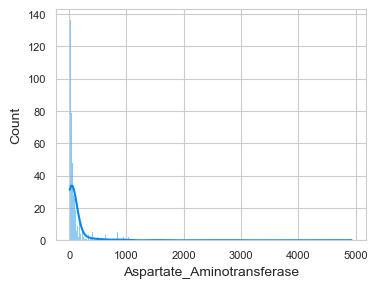

Skewness of the column: 10.559418140529846


In [72]:
plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Aspartate_Aminotransferase',kde=True)
plt.show()
print("Skewness of the column:",df['Aspartate_Aminotransferase'].skew())

Aspartate_Aminotransferase is a skew distribution because it's skewness is greater than 5.

In [73]:
#Basic info about column
df["Aspartate_Aminotransferase"].describe()

count     570.000000
mean      109.380702
std       290.880671
min        10.000000
25%        25.000000
50%        41.000000
75%        86.750000
max      4929.000000
Name: Aspartate_Aminotransferase, dtype: float64

In [74]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['Aspartate_Aminotransferase'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['Aspartate_Aminotransferase'].quantile(0.75) # 75%
print("upper_quantile",Q3)


lower_quantile 25.0
upper_quantile 86.75


In [75]:
# To Find IQR.

IQR=Q3-Q1
IQR

61.75

In [76]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit -67.625
upper_limit 179.375


In [77]:
# To find value above upper_limit.

df.loc[df['Aspartate_Aminotransferase']>upper_limit] 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
16,38,Male,1.8,0.8,342.0,35.0,441,7.6,4.4,1.3,1
18,40,Female,0.9,0.3,293.0,35.0,245,6.8,3.1,0.8,1
25,34,Male,4.1,2.0,289.0,35.0,731,5.0,2.7,1.1,1
27,34,Male,6.2,3.0,240.0,35.0,850,7.2,4.0,1.2,1
43,50,Male,2.6,1.2,415.0,35.0,576,6.4,3.2,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
548,42,Male,11.1,6.1,214.0,60.0,186,6.9,2.8,2.8,1
558,51,Male,4.0,2.5,275.0,35.0,330,7.5,4.0,1.1,1
560,66,Male,15.2,7.7,356.0,35.0,562,6.5,2.2,0.4,1
561,66,Male,16.6,7.6,315.0,35.0,384,6.9,2.0,0.4,1


In [78]:
# To find percentage of outliers.

len(df.loc[df['Aspartate_Aminotransferase']>upper_limit] )/len(df)

0.11578947368421053

In [79]:
# To find value below lower_limit.

df.loc[df['Aspartate_Aminotransferase']<lower_limit] # There are no data in lower limit.

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [80]:
# To set the value of outliers is mean.

df["Aspartate_Aminotransferase"] = np.where(
    df["Aspartate_Aminotransferase"]>upper_limit,
    df["Aspartate_Aminotransferase"].median(),
    np.where(
        df["Aspartate_Aminotransferase"]<lower_limit,
        df["Aspartate_Aminotransferase"].median(),
        df['Aspartate_Aminotransferase']
    )
)

In [81]:
# Check Outliers

# Find value less than lower limit

df.loc[df['Aspartate_Aminotransferase']>upper_limit]

# To find value below lower_limit.

df.loc[df['Aspartate_Aminotransferase']<lower_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


**Total_Protiens**

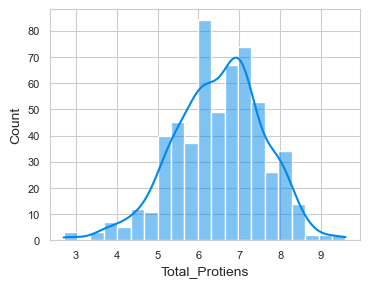

Skewness of the column: -0.3109288748232023


In [82]:
plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Total_Protiens',kde=True)
plt.show()
print("Skewness of the column:",df['Total_Protiens'].skew())

Total_Protiens is a normal distribution because it's skewness is less than -5.

In [83]:
#Basic info about column
df["Total_Protiens"].describe()

count    570.000000
mean       6.496316
std        1.088300
min        2.700000
25%        5.800000
50%        6.600000
75%        7.200000
max        9.600000
Name: Total_Protiens, dtype: float64

In [84]:
lower_limit=df['Total_Protiens'].mean()-3*df['Total_Protiens'].std()
upper_limit=df['Total_Protiens'].mean()+3*df['Total_Protiens'].std()
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_limit 3.2314147412227516
upper_limit 9.761216837724618


In [85]:
# Find value less than lower limit

df.loc[df['Total_Protiens']>upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [86]:
# To find percentage of outliers.

len(df.loc[df['Total_Protiens']>upper_limit] )/len(df)

0.0

In [87]:
# To find value below lower_limit.

df.loc[df['Total_Protiens']<lower_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
180,75,Male,2.8,1.3,250.0,23.0,29.0,2.7,0.9,0.5,1
181,75,Male,2.9,1.3,218.0,33.0,37.0,3.0,1.5,1.0,1
269,26,Male,0.6,0.1,110.0,15.0,20.0,2.8,1.6,1.3,1


In [88]:
# To set the value of outliers is mean.

df["Total_Protiens"] = np.where(
    df["Total_Protiens"]>upper_limit,
    df["Total_Protiens"].mean(),
    np.where(
        df["Total_Protiens"]<lower_limit,
        df["Total_Protiens"].mean(),
        df['Total_Protiens']
    )
)

In [89]:
# Check Outliers

# Find value less than lower limit

df.loc[df['Total_Protiens']>upper_limit]

# To find value below lower_limit.

df.loc[df['Total_Protiens']<lower_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


**Albumin_and_Globulin_Ratio**

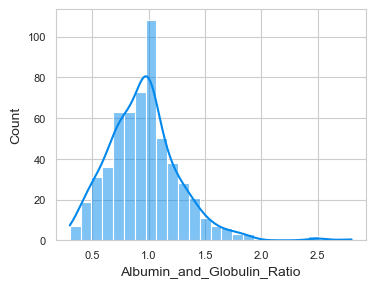

Skewness of the column: 1.0046747430288905


In [90]:
plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Albumin_and_Globulin_Ratio',kde=True)
plt.show()
print("Skewness of the column:",df['Albumin_and_Globulin_Ratio'].skew())

Albumin_and_Globulin_Ratio is a normal distribution because it's skewness is less than 5.

In [91]:
#Basic info about column
df["Albumin_and_Globulin_Ratio"].describe()

count    570.000000
mean       0.948018
std        0.318510
min        0.300000
25%        0.700000
50%        0.950000
75%        1.100000
max        2.800000
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [92]:
lower_limit=df['Albumin_and_Globulin_Ratio'].mean()-3*df['Albumin_and_Globulin_Ratio'].std()
upper_limit=df['Albumin_and_Globulin_Ratio'].mean()+3*df['Albumin_and_Globulin_Ratio'].std()
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_limit -0.007512414654850863
upper_limit 1.9035475023741488


In [93]:
# Find value less than lower limit

df.loc[df['Albumin_and_Globulin_Ratio']>upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
548,42,Male,11.100000,6.100000,214.0,60.0,41.0,6.9,2.8,2.8,1
572,32,Male,15.600000,9.500000,134.0,54.0,125.0,5.6,4.0,2.5,1
575,32,Male,3.321754,1.497544,560.0,41.0,88.0,7.9,2.5,2.5,1


In [94]:
# To find percentage of outliers.

len(df.loc[df['Albumin_and_Globulin_Ratio']>upper_limit] )/len(df)

0.005263157894736842

In [95]:
# To find value below lower_limit.

df.loc[df['Albumin_and_Globulin_Ratio']<lower_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [96]:
# To set the value of outliers is mean.

df["Albumin_and_Globulin_Ratio"] = np.where(
    df["Albumin_and_Globulin_Ratio"]>upper_limit,
    df["Albumin_and_Globulin_Ratio"].mean(),
    np.where(
        df["Albumin_and_Globulin_Ratio"]<lower_limit,
        df["Albumin_and_Globulin_Ratio"].mean(),
        df['Albumin_and_Globulin_Ratio']
    )
)

In [97]:
# Check Outliers

# Find value less than lower limit

df.loc[df['Albumin_and_Globulin_Ratio']>upper_limit]

# To find value below lower_limit.

df.loc[df['Albumin_and_Globulin_Ratio']<lower_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


**iii).Handling Categorical Data**

In [98]:
#Label Male as 1 and Female as 0

def partition(x):
    if x =='Female':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

In [99]:
df.sample(7)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
374,56,0,0.7,0.1,145.0,26.0,23.0,7.0,4.0,1.30,0
248,40,1,0.7,0.1,202.0,37.0,29.0,5.0,2.6,1.00,1
384,34,1,3.7,2.1,490.0,115.0,91.0,6.5,2.8,0.70,1
334,13,0,0.7,0.2,350.0,17.0,24.0,7.4,4.0,1.10,1
88,18,1,0.6,0.2,538.0,33.0,34.0,7.5,3.2,0.70,1
421,26,1,1.0,0.3,163.0,48.0,71.0,7.1,3.7,1.00,0
427,65,1,0.9,0.2,170.0,33.0,66.0,7.0,3.0,0.75,1


**iv).Scaling**

In [100]:
scale=MinMaxScaler() # for normalize data in the range of 0 to 1.

In [101]:
df[["Age","Alkaline_Phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase"]] = scale.fit_transform(df[["Age","Alkaline_Phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase"]])

In [102]:
#To check scaling

df.sample(6)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
68,0.720930,1,0.7,0.2,0.183908,0.161905,0.095238,6.3,3.7,1.4,1
92,0.651163,1,8.6,4.0,0.245559,0.238095,0.184524,7.4,3.0,0.6,1
229,0.488372,1,0.6,0.2,0.237200,0.152381,0.065476,6.0,3.0,1.0,1
412,0.709302,1,4.9,2.7,0.132706,0.219048,0.363095,7.1,2.9,0.7,1
377,0.186047,0,0.6,0.2,0.145246,0.019048,0.017857,6.1,3.0,0.9,0
212,0.209302,1,2.7,1.0,0.101358,0.685714,0.696429,5.5,3.1,1.2,0


In [103]:
#To check affect on shape of data.

df.shape

(570, 11)

# 8.Feature Engineering

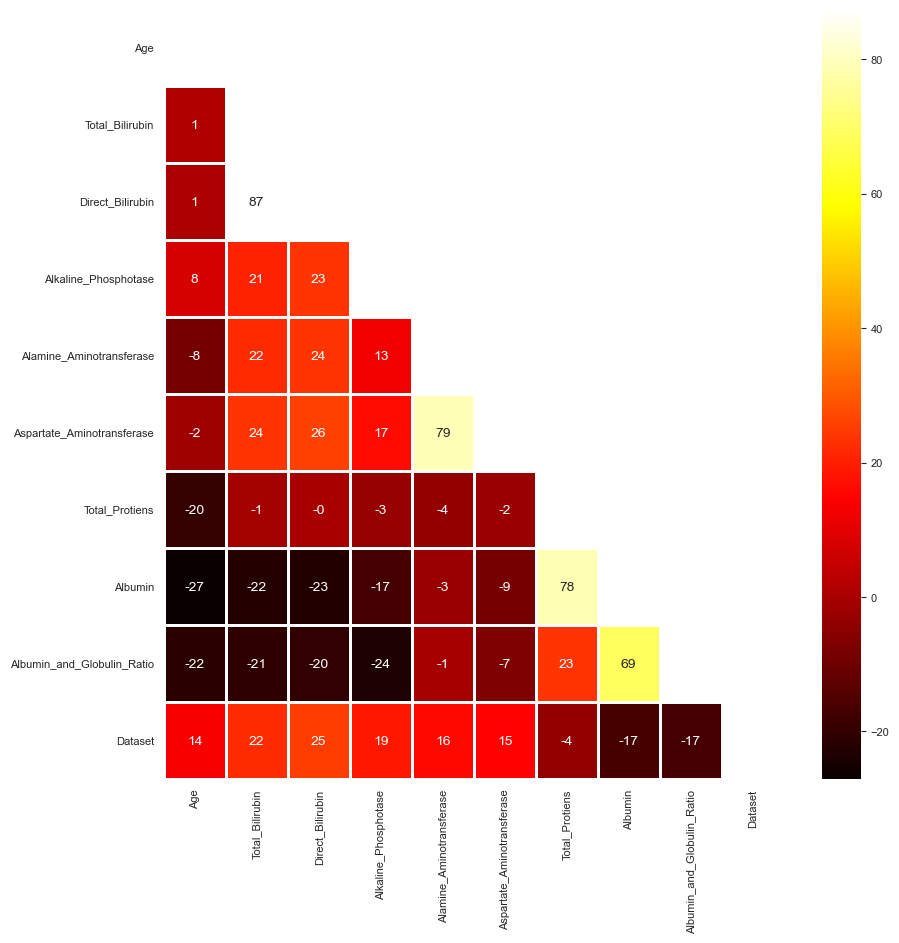

In [108]:
mask=np.zeros_like(num_col.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(num_col.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap='hot')

# 9.Split Data into x and y

In [109]:
## Creating independent and dependent variable

X = df.drop('Dataset', axis=1) #independent variable
y = df.Dataset #dependent variable

In [112]:
#To check column X values.

X.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
358,0.383721,1,0.7,0.2,0.118077,0.171429,0.142857,5.6,2.6,0.8
88,0.162791,1,0.6,0.2,0.496343,0.219048,0.142857,7.5,3.2,0.7
339,0.825581,1,1.4,0.4,0.158830,0.380952,0.119048,5.9,2.6,0.7
54,0.441860,1,8.9,4.5,0.218391,0.200000,0.303571,5.8,2.0,0.5
353,0.511628,0,1.4,0.8,0.583072,0.952381,0.988095,7.2,3.9,1.1


In [113]:
#To check column y value

y.sample(5)

357    1
84     1
159    1
168    1
80     1
Name: Dataset, dtype: int64

# 10.Split data for trainning and testing.

In [115]:
## preparing training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [116]:
#To cheak the size 
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((427, 10), (143, 10), (427,), (143,))

In [117]:
# Check data of y is balanced or not

y.value_counts() # We get here unbalance data

Dataset
1    406
0    164
Name: count, dtype: int64

In [118]:
#To apply the SMOTE technique to balance the output/target column
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X_train,y_train)

In [121]:
print("Actual Classes",Counter(y_train)) # Before Balance
print("SMOTE Classes",Counter(y_smote)) # After Balanced

Actual Classes Counter({1: 303, 0: 124})
SMOTE Classes Counter({1: 303, 0: 303})


# 11.Model Building And Evaluation

1.Random Forest
F1 Score:  0.8038277511961723

Classification Report
               precision    recall  f1-score   support

           0       0.49      0.45      0.47        40
           1       0.79      0.82      0.80       103

    accuracy                           0.71       143
   macro avg       0.64      0.63      0.64       143
weighted avg       0.71      0.71      0.71       143



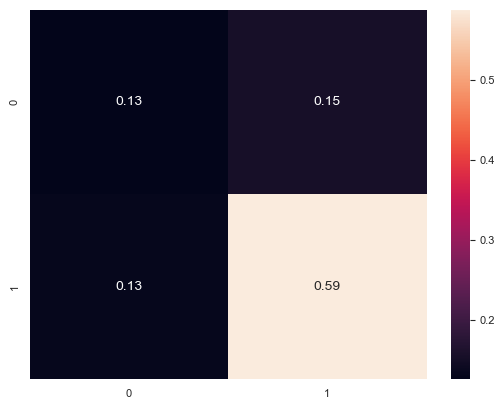

2.Logistic Regression
F1 Score:  0.6936416184971098

Classification Report
               precision    recall  f1-score   support

           0       0.41      0.75      0.53        40
           1       0.86      0.58      0.69       103

    accuracy                           0.63       143
   macro avg       0.63      0.67      0.61       143
weighted avg       0.73      0.63      0.65       143



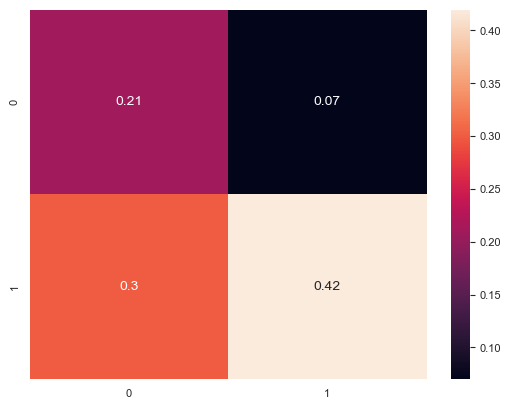

3.XGBoost
F1 Score:  0.819047619047619

Classification Report
               precision    recall  f1-score   support

           0       0.53      0.47      0.50        40
           1       0.80      0.83      0.82       103

    accuracy                           0.73       143
   macro avg       0.67      0.65      0.66       143
weighted avg       0.73      0.73      0.73       143



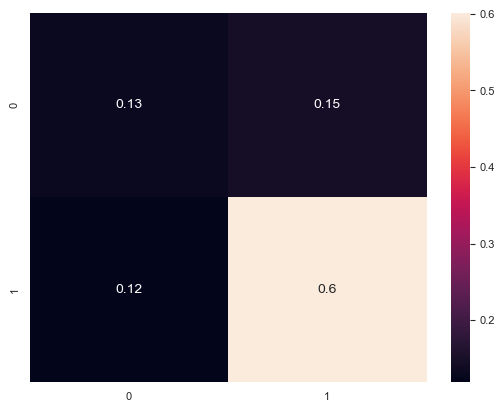

4.Support Vector Machine
F1 Score:  0.5806451612903225

Classification Report
               precision    recall  f1-score   support

           0       0.36      0.82      0.50        40
           1       0.87      0.44      0.58       103

    accuracy                           0.55       143
   macro avg       0.61      0.63      0.54       143
weighted avg       0.72      0.55      0.56       143



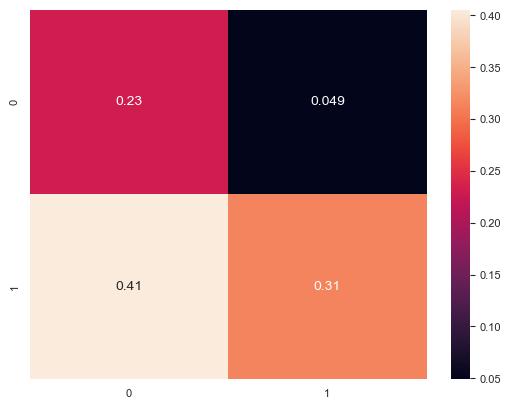

5.KNN
F1 Score:  0.6179775280898877

Classification Report
               precision    recall  f1-score   support

           0       0.29      0.50      0.37        40
           1       0.73      0.53      0.62       103

    accuracy                           0.52       143
   macro avg       0.51      0.52      0.49       143
weighted avg       0.61      0.52      0.55       143



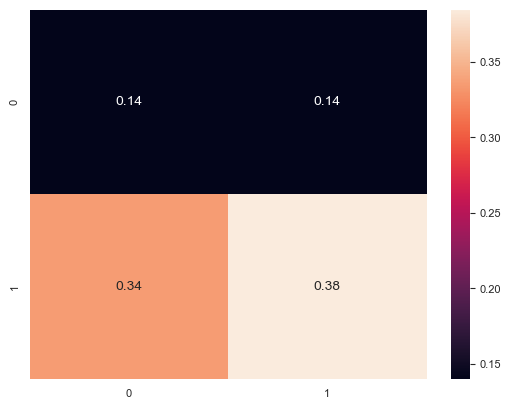

In [134]:
models= {
    '1.Random Forest': RandomForestClassifier(),
    '2.Logistic Regression': LogisticRegression(),
    '3.XGBoost' : XGBClassifier(),'4.Support Vector Machine': SVC(),'5.KNN': KNeighborsClassifier()
}

for name,model in models.items():
    model.fit(X_smote,y_smote)
    ypred = model.predict(X_test)
    print(name)
    print('F1 Score: ',f1_score(y_test,ypred))
    sns.heatmap(confusion_matrix(y_test,ypred)/np.sum(confusion_matrix(y_test,ypred)),annot=True)
    print("\nClassification Report\n",classification_report(y_test,ypred))
    plt.show()